In [ ]:
# Import the necessary libraries for the project

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [ ]:
df_adoption = pd.read_csv('DataSet.csv')
df_adoption.head()

,A1,A2,A3,B1,B2,B3,B4,C1_1,C1_2,C1_3,...,rD1_11,rD1_10,rD1_12,rD1_9,rC1_10,rC1_11,rC1_9,rC1_8,rC1_12,ProvinceMappingToB1
0,1,3,6,1,1,4,4,7,7,6,...,2,2,2,2,5,5,2,6,1,Eastern Cape
1,1,4,5,1,2,4,3,3,3,3,...,4,4,4,4,5,6,6,6,6,Eastern Cape
2,1,2,4,1,2,3,1,7,6,4,...,2,2,2,2,6,4,2,2,2,Eastern Cape
3,1,4,4,1,2,4,3,6,6,5,...,3,4,4,4,4,4,4,4,1,Eastern Cape
4,1,4,4,1,2,4,3,3,7,5,...,2,2,5,3,7,5,6,6,4,Eastern Cape


In [ ]:
df_adoption.shape

(207, 137)

In [ ]:
df_adoption.dtypes

A1                      int64
A2                      int64
A3                      int64
B1                      int64
B2                      int64
                        ...  
rC1_11                  int64
rC1_9                   int64
rC1_8                   int64
rC1_12                  int64
ProvinceMappingToB1    object
Length: 137, dtype: object

In [ ]:
df_adoption.describe()

,A1,A2,A3,B1,B2,B3,B4,C1_1,C1_2,C1_3,...,rD1_20,rD1_11,rD1_10,rD1_12,rD1_9,rC1_10,rC1_11,rC1_9,rC1_8,rC1_12
count,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,...,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,1.0,4.420290,4.710145,4.932367,5.594203,4.743961,3.125604,6.130435,6.289855,5.980676,...,4.811594,2.845411,3.004831,3.033816,2.386473,5.091787,4.787440,4.565217,4.487923,3.135266
std,0.0,1.132989,0.832031,2.856651,14.832383,1.313540,1.485748,1.423585,1.319401,1.507139,...,1.940439,1.593453,1.617554,1.693453,1.416070,1.865965,1.875555,1.921859,2.028582,1.910894
min,1.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,4.000000,3.000000,2.000000,4.000000,2.000000,6.000000,6.000000,6.000000,...,3.000000,2.000000,2.000000,2.000000,1.000000,4.000000,3.000000,3.000000,3.000000,2.000000
50%,1.0,5.000000,5.000000,3.000000,2.000000,5.000000,3.000000,7.000000,7.000000,7.000000,...,5.000000,3.000000,3.000000,3.000000,2.000000,6.000000,5.000000,5.000000,5.000000,3.000000
75%,1.0,5.000000,5.000000,9.000000,5.000000,6.000000,4.000000,7.000000,7.000000,7.000000,...,6.000000,4.000000,4.000000,4.000000,3.000000,7.000000,7.000000,6.000000,6.000000,4.000000
max,1.0,7.000000,6.000000,9.000000,99.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


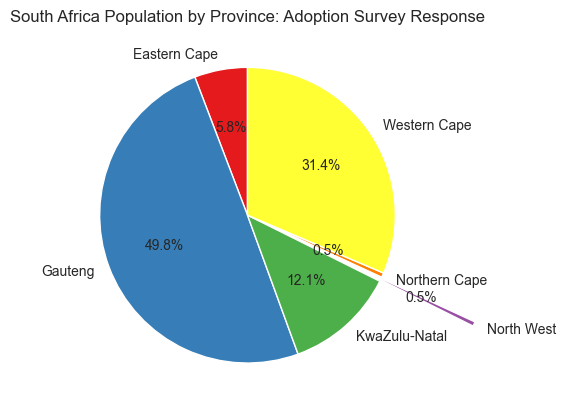

In [ ]:
# respondents by province percentage
province_population = df_adoption.groupby('ProvinceMappingToB1').size()
provinces = ['Eastern Cape', 'Gauteng', 'KwaZulu-Natal', 'North West', 'Northern Cape', 'Western Cape']
# only "explode" the 4th  (i.e. 'North West')
explode = (0, 0, 0, 0.7, 0, 0)

plt.pie(province_population, explode=explode, labels=provinces, autopct='%1.1f%%',
         startangle=90, colors=sns.color_palette("Set1"))
plt.title('South Africa Population by Province: Adoption Survey Response')
plt.show()

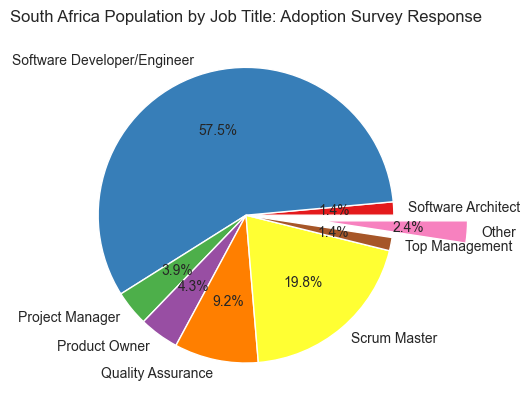

In [ ]:
# respondents by job title percentage
title_population = df_adoption.groupby('B2').size() #JobTitle
titles = ['Software Architect', 'Software Developer/Engineer', 'Project Manager', 'Product Owner', 'Quality Assurance', 'Scrum Master', 'Top Management', 'Other']
# only "explode" the 4th  (i.e. 'North West')
explode = (0, 0, 0, 0, 0, 0, 0, 0.5)

plt.pie(title_population, explode= explode, labels=titles, autopct='%1.1f%%',colors=sns.color_palette("Set1")
        )
plt.title('South Africa Population by Job Title: Adoption Survey Response')
plt.show()

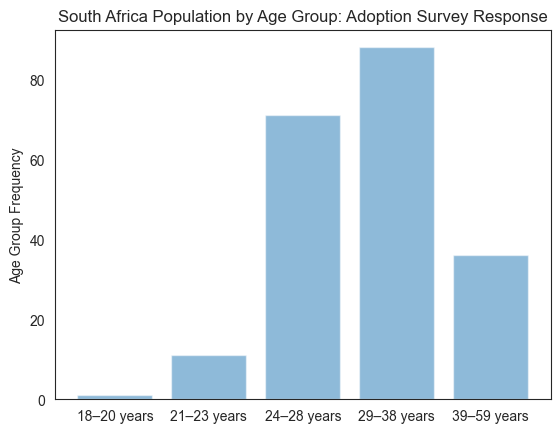

In [ ]:
# respondents by age group frequency
titles = ('18–20 years', '21–23 years', '24–28 years', '29–38 years', '39–59 years')
y_pos = np.arange(len(titles))
ageGroups = df_adoption.groupby('A3').size() #AgeGroup

plt.bar(y_pos, ageGroups, align='center', alpha=0.5)
plt.xticks(y_pos, titles)
plt.ylabel('Age Group Frequency')
plt.title('South Africa Population by Age Group: Adoption Survey Response')

plt.show()

In [ ]:
corr_data = df_adoption[['experience','OrganisationalBehaviour','rSprintManagement','Relativeadvantage','Training','Specialization','Recognition','Customercollaboration','Compatibility','Escalationofcommitment','Complexity','rTeamwork','ResourceManagement','rOverEngineering','adoption']]

In [ ]:
corr_data.head()

,experience,OrganisationalBehaviour,rSprintManagement,Relativeadvantage,Training,Specialization,Recognition,Customercollaboration,Compatibility,Escalationofcommitment,Complexity,rTeamwork,ResourceManagement,rOverEngineering,adoption
0,6.75,2.90909,1.750,5.77778,6.00,6.00,3.75,2.50000,6.00000,6.00000,5.00000,2.000,2.0,3.8,4.66667
1,2.75,4.36364,4.500,5.77778,3.00,4.00,4.50,2.33333,5.33333,2.00000,6.00000,5.250,4.0,5.8,5.66667
2,6.00,6.00000,5.750,6.00000,6.25,6.00,6.00,6.00000,6.00000,6.00000,6.00000,5.750,6.0,3.2,5.00000
3,6.00,5.63636,4.375,6.00000,6.00,4.25,4.25,5.66667,6.00000,6.33333,6.00000,5.125,5.5,3.4,5.00000
4,5.50,4.36364,4.500,6.77778,1.00,5.00,2.75,5.50000,7.00000,5.33333,6.66667,6.500,6.5,5.6,5.00000


In [ ]:
# Entire table correlation
corr_data.corr(method='spearman')

,experience,OrganisationalBehaviour,rSprintManagement,Relativeadvantage,Training,Specialization,Recognition,Customercollaboration,Compatibility,Escalationofcommitment,Complexity,rTeamwork,ResourceManagement,rOverEngineering,adoption
experience,1.000000,0.139531,0.316402,0.293796,0.255821,0.246037,0.192574,0.202116,0.232045,0.272375,0.191271,0.210299,0.063094,0.086642,0.304158
OrganisationalBehaviour,0.139531,1.000000,0.247152,0.288419,0.579393,0.240363,0.662052,0.715716,0.270660,0.296222,0.363691,0.154942,0.635112,-0.178505,0.278920
rSprintManagement,0.316402,0.247152,1.000000,0.101978,0.251743,-0.011303,0.093892,0.256398,0.088090,0.075912,0.097081,0.712279,0.160085,0.255697,0.297625
Relativeadvantage,0.293796,0.288419,0.101978,1.000000,0.285854,0.266456,0.240674,0.349472,0.635249,0.283855,0.512305,0.011014,0.237867,-0.018151,0.660839
Training,0.255821,0.579393,0.251743,0.285854,1.000000,0.282893,0.651336,0.509956,0.233045,0.214396,0.261416,0.095799,0.391029,-0.014211,0.222562
Specialization,0.246037,0.240363,-0.011303,0.266456,0.282893,1.000000,0.235135,0.313209,0.323522,0.343426,0.306408,-0.070864,0.240670,-0.228112,0.232138
Recognition,0.192574,0.662052,0.093892,0.240674,0.651336,0.235135,1.000000,0.552896,0.236751,0.156284,0.341176,0.065907,0.478488,-0.085744,0.196144
Customercollaboration,0.202116,0.715716,0.256398,0.349472,0.509956,0.313209,0.552896,1.000000,0.285166,0.287296,0.392764,0.106477,0.573110,-0.123426,0.339278
Compatibility,0.232045,0.270660,0.088090,0.635249,0.233045,0.323522,0.236751,0.285166,1.000000,0.214900,0.580736,0.011467,0.251783,-0.042956,0.497953
Escalationofcommitment,0.272375,0.296222,0.075912,0.283855,0.214396,0.343426,0.156284,0.287296,0.214900,1.000000,0.267068,-0.015574,0.301922,-0.327458,0.223833


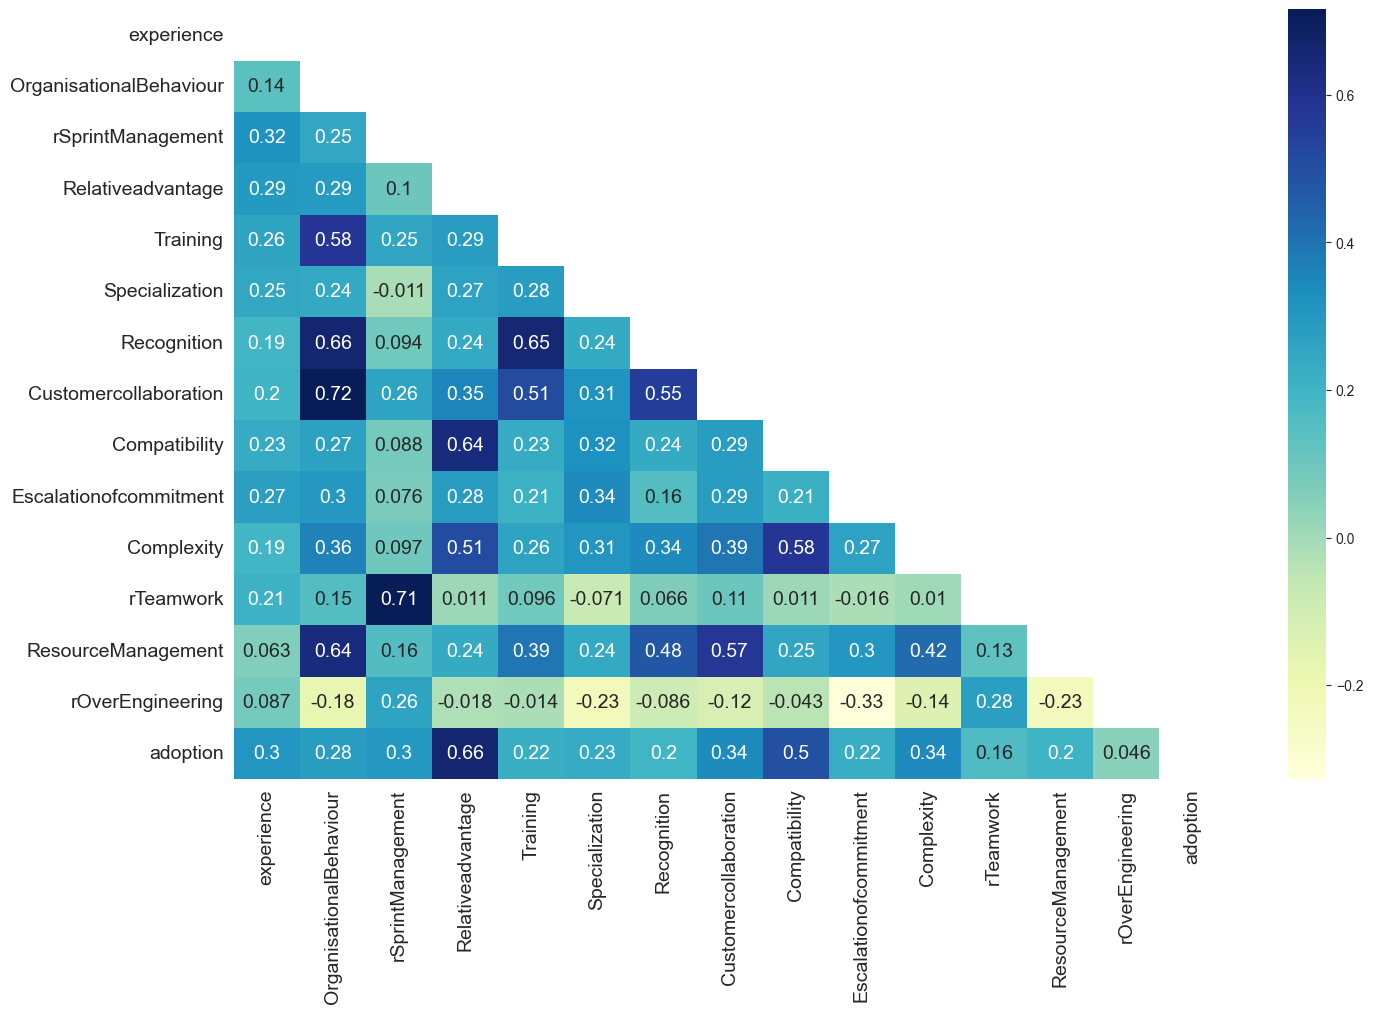

In [ ]:
mask = np.zeros_like(corr_data.corr(numeric_only = True))
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

plt.figure(figsize=(16,10))
sns.heatmap(corr_data.corr(method='spearman'), mask=mask, annot=True, annot_kws={"size": 14}, cmap="YlGnBu")
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Multivariate regression (Multi linear regression)
Training and Test Dataset Split

In [ ]:
regr_data = corr_data
regr_data.head()

,experience,OrganisationalBehaviour,rSprintManagement,Relativeadvantage,Training,Specialization,Recognition,Customercollaboration,Compatibility,Escalationofcommitment,Complexity,rTeamwork,ResourceManagement,rOverEngineering,adoption
0,6.75,2.90909,1.750,5.77778,6.00,6.00,3.75,2.50000,6.00000,6.00000,5.00000,2.000,2.0,3.8,4.66667
1,2.75,4.36364,4.500,5.77778,3.00,4.00,4.50,2.33333,5.33333,2.00000,6.00000,5.250,4.0,5.8,5.66667
2,6.00,6.00000,5.750,6.00000,6.25,6.00,6.00,6.00000,6.00000,6.00000,6.00000,5.750,6.0,3.2,5.00000
3,6.00,5.63636,4.375,6.00000,6.00,4.25,4.25,5.66667,6.00000,6.33333,6.00000,5.125,5.5,3.4,5.00000
4,5.50,4.36364,4.500,6.77778,1.00,5.00,2.75,5.50000,7.00000,5.33333,6.66667,6.500,6.5,5.6,5.00000


In [ ]:
adoption = regr_data['adoption']
features = regr_data.drop('adoption', axis=1) # axis=0 drop row, axis=1 drop column

X_train, X_test, y_train, y_test = train_test_split(features, adoption,
                                                    test_size=0.3, random_state=4) # shuffle data for randomness

# % of training set
len(X_train)/len(features)

0.6956521739130435

In [ ]:
# % of test data set
X_test.shape[0]/features.shape[0]

0.30434782608695654

In [ ]:
regr = LinearRegression()
regr.fit(X_train, y_train)

#print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)

Training data r-squared: 0.563689495240858
Test data r-squared: 0.3058255265939509
Intercept 0.4799991270194637


In [ ]:
# Original model without log adoption and all features

X_incl_const = sm.add_constant(X_train)

model=sm.OLS(y_train, X_incl_const)    #Ordinary Least Squares
orig_model_results = model.fit()

pd.DataFrame({'coef': orig_model_results.params, 'p-value': round(orig_model_results.pvalues,3)})

#print('BIC is', orig_model_results.bic)
#print('r-squared is', orig_model_results.rsquared)

,coef,p-value
const,0.479999,0.413
experience,-0.037477,0.592
OrganisationalBehaviour,-0.039237,0.672
rSprintManagement,0.177720,0.005
Relativeadvantage,0.857940,0.000
Training,-0.069476,0.253
Specialization,-0.014877,0.790
Recognition,0.028190,0.645
Customercollaboration,0.089686,0.308
Compatibility,0.036030,0.627


Data Transformations

In [ ]:
adoption = np.log(regr_data['adoption']) # Use log adoption
features = regr_data.drop('adoption', axis=1) # axis=0 drop row, axis=1 drop column

X_train, X_test, y_train, y_test = train_test_split(features, adoption,
                                                    test_size=0.3, random_state=4) # shuffle data for randomness

regr = LinearRegression()
regr.fit(X_train, y_train)

#print out r-squared for training and test datasets
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

print('Intercept', regr.intercept_)

Training data r-squared: 0.5274697624996412
Test data r-squared: 0.05206913118359735
Intercept 0.5397671206948853


In [ ]:
X_incl_const = sm.add_constant(X_train)

model=sm.OLS(y_train, X_incl_const)    #Ordinary Least Squares

log_model_results = model.fit()

pd.DataFrame({'coef': log_model_results.params, 'p-value': round(log_model_results.pvalues,3)})

,coef,p-value
const,0.539767,0.001
experience,-0.001728,0.929
OrganisationalBehaviour,-0.008220,0.748
rSprintManagement,0.038781,0.026
Relativeadvantage,0.234677,0.000
Training,-0.019602,0.243
Specialization,-0.011701,0.449
Recognition,0.000660,0.969
Customercollaboration,0.023251,0.339
Compatibility,-0.004656,0.820


In [ ]:
variance_inflation_factor(exog=X_incl_const.values, exog_idx=4)   #shift+tab to see details of the function - 4 forth item is list i.e. Relativeadvantage

#type(X_incl_const)

2.236725485779042

In [ ]:
len(X_incl_const.columns)
X_incl_const.shape[1]

15

In [ ]:
# print out all the VIFs
for i in range(X_incl_const.shape[1]):
    print(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print('completed')

96.97342923706309
1.5014794190765115
4.1322973491822514
2.9855734632521234
2.236725485779042
2.1932637764165412
1.3518405317333413
2.519349979415683
3.647185501937027
2.0190132387218402
1.685200743639979
2.0045610421140525
2.592616728080073
2.1367903999329894
1.5422463350492013
completed


In [ ]:
vif = [] # empty list
for i in range(X_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
print(vif)

[96.97342923706309, 1.5014794190765115, 4.1322973491822514, 2.9855734632521234, 2.236725485779042, 2.1932637764165412, 1.3518405317333413, 2.519349979415683, 3.647185501937027, 2.0190132387218402, 1.685200743639979, 2.0045610421140525, 2.592616728080073, 2.1367903999329894, 1.5422463350492013]


In [ ]:
# simplified code
vif = [variance_inflation_factor(exog=X_incl_const.values, exog_idx=i) for i in range(X_incl_const.shape[1])]
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif,2)})
# VIF > 10 is probablematic - therefore there is no-multicollinearity

,coef_name,vif
0,const,96.97
1,experience,1.50
2,OrganisationalBehaviour,4.13
3,rSprintManagement,2.99
4,Relativeadvantage,2.24
5,Training,2.19
6,Specialization,1.35
7,Recognition,2.52
8,Customercollaboration,3.65
9,Compatibility,2.02


Baysian Information Criterion (BIC)
To discover what to remove from the model - lower is better

In [ ]:
# Original model all features
print('BIC is', orig_model_results.bic)
print('r-squared is', orig_model_results.rsquared)

BIC is 369.4207587368273
r-squared is 0.563689495240858


In [ ]:
# log adoption and all features

print('BIC is', log_model_results.bic)
print('r-squared is', log_model_results.rsquared)

BIC is -0.8821670755035456
r-squared is 0.5274697624996412


In [ ]:
# Reduced model excluding 'experience', 'Recognition', 'Compatibility'

X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['experience', 'Recognition', 'Compatibility'], axis=1)

model=sm.OLS(y_train, X_incl_const)    #Ordinary Least Squares
log_reduction_model_results = model.fit()

further_reduced_coef = pd.DataFrame({'coef': log_reduction_model_results.params, 'p-value': round(log_reduction_model_results.pvalues,2)})

print('BIC is', log_reduction_model_results.bic)
print('r-squared is', log_reduction_model_results.rsquared)

BIC is -15.727752798227158
r-squared is 0.5272601811122688


Residuals & Residual Plots

In [ ]:
# Mean Square Error & R-Squared

full_mse = round(orig_model_results.mse_resid, 3)
full_rsquared = round(orig_model_results.rsquared, 3)

log_mse = round(log_model_results.mse_resid, 3)
log_rsquared = round(log_model_results.rsquared, 3)

log_with_omitted_var_mse = round(log_reduction_model_results.mse_resid, 3)
log_with_omitted_var_rsquared = round(log_reduction_model_results.rsquared, 3)

In [ ]:
pd.DataFrame({'R-Squared': [full_rsquared, log_rsquared, log_with_omitted_var_rsquared],
             'MSE': [full_mse, log_mse, log_with_omitted_var_mse]},
            index=['Full Feature Set Model', 'Log Full Feature Set Model', 'Log with Omitted Features Model' ])

,R-Squared,MSE
Full Feature Set Model,0.564,0.507
Log Full Feature Set Model,0.527,0.039
Log with Omitted Features Model,0.527,0.038
